# Energy market: an overview
Companies within the energy sector are involved in various types of energy. They typically fall into one of two categories:

1. Non-renewable with petroleum products and oil, natural gas, gasoline, diesel, coal;

2. renewable with solar, wind, hydropower, biomass, and geothermal.

## **Indices**
Some key indices are:

### 1. **Oil & Gas Indices:**
   - **WTI Crude Oil (West Texas Intermediate)**: Tracks the price of crude oil, especially in the U.S.
   - **Brent Crude Oil**: Represents crude oil sourced from the North Sea, widely used as a global benchmark.
   - **Natural Gas (Henry Hub)**: A reference point for natural gas pricing in North America.
   - **Oil & Gas Producers Index (e.g., XOI, OIH)**: Tracks stocks of major oil and gas producers.
   
### 2. **Renewables Indices:**
   - **S&P Global Clean Energy Index**: Tracks clean energy companies, focusing on solar, wind, and other renewable sources.
   - **Nasdaq Clean Edge Green Energy Index**: Covers companies involved in renewable energy, energy efficiency, and cleaner technologies.

### 3. **Electricity Market Indices:**
   - **Electricity Price Indices** (e.g., EEX, PJM): For tracking electricity prices in various regional markets.
   - **Nord Pool Spot**: Tracks electricity prices in the Nordic region, including Denmark, Finland, Sweden, and Norway.
   - **PJM Power Price Index**: Tracks electricity pricing in the Eastern U.S. market.

### 4. **Energy Sector Indices (General):**
   - **Energy Select Sector SPDR Fund (XLE)**: Includes a broad range of energy companies in sectors like oil, gas, and utilities.
   - **S&P 500 Energy Index**: Covers energy companies within the S&P 500.
   - **MSCI ACWI Energy Index**: Tracks energy companies globally.

### 5. **Carbon/Emission Trading Indices:**
   - **Carbon Futures (EU ETS, CORSIA)**: Indices related to carbon trading and emission allowances, such as EU Emissions Trading Scheme (ETS) prices.

##**FACTORS THAT INFLUENCE THE ENERGY MARKET**
- Politics and geo-politics: taxes or environmental regulation or carbon pricing and emissions trading schemes influence the energy mix. In addition it depends on the international relationship, sanctions or conflicts;
- Volatility: energy prices are highly volatile due to supply chain disruptions, geopolitical risks, and weather conditions.
Electricity prices fluctuate due to demand-supply imbalances and grid stability concerns.
- Strong Seasonality: energy demand varies with the seasons (e.g., gas demand rises in winter, electricity demand peaks in summer due to air conditioning).
Renewable energy production is intermittent (e.g., solar and wind generation depend on weather).
- Battery storage and smart grid technology play a growing role.Wind and solar power depend on natural conditions, making storage and grid flexibility crucial.

As we could imagine, this market has:
- mean reverting process, since after some peaks the general shape returns back to the average process;
- high dependent regime level, from which we see the so-called volatility clustering;
- high-Frequency Trading (HFT): Less dominant than equities but growing in intraday electricity markets.

For that reason, a momentum trading strategy seems to fit well this features.


# Renewable energy market
In this reseach, we want to look in the energy markets, in the specific in the renewable branch.
There are a few key trends that are shaping the renewable and clean energy sector. First, increased government incentives and subsidies are making it more financially viable for companies to invest in and develop clean energy technologies. This is especially evident in the United States, where legislative support for clean energy has gained momentum.

Second, advancements in technology are reducing the costs associated with renewable energy production, making it more competitive with traditional energy sources. Consumer preferences are also shifting toward sustainable products and services, encouraging businesses to prioritize clean energy initiatives.

I just want download the data of **NextEra Energy** (NEE) and **SHELL** and applying a momentum trading strategy on them.

The first company is a global leader in clean energy and invests heavily in solar, wind, and battery storage technology.

The second one of the world's largest energy companies, operating in multiple segments across the oil, natural gas, and renewable energy markets. It plays a key role in traditional fossil fuels, while also expanding into renewable energy and sustainability-focused initiatives.
But I choose it because it doesn't work in the renewable sector like NEE.

In [58]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

In [59]:
NEE= yf.download("NEE", start="2024-01-01", end="2025-02-08")["Close"].reset_index() #downloaded in 7-02
NEE_general=yf.download("NEE", start="2024-12-01", end="2025-02-08")
SHELL= yf.download("SHEL", start="2024-01-01", end="2025-02-08")["Close"].reset_index() #downloaded in 7-02
SHELL_general=yf.download("SHEL", start="2024-12-01", end="2025-02-08")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:
NEE= NEE.ffill()
SHELL= SHELL.ffill()
SHELL

Ticker,Date,SHEL
0,2024-01-02,63.306892
1,2024-01-03,64.286598
2,2024-01-04,63.739120
3,2024-01-05,63.133999
4,2024-01-08,62.067833
...,...,...
272,2025-02-03,65.169998
273,2025-02-04,66.629997
274,2025-02-05,66.529999
275,2025-02-06,66.160004


For these two stocks we are going to apply the **momentum trading strategy**.

The goal is to work with volatility by finding buying opportunities in short-term uptrends and then selling when the securities start to lose momentum.

The risks of momentum trading include entering a position too early, closing out too late, getting distracted, and missing key trends and technical deviations.

## Moving averages
**Definition**: A moving average is an average of data points (usually price) for a specific time period.
The calculation is done by moving a window in order to form a trend-following indicator.

A moving average doesn't predict price direction. Instead, it defines the current direction.

---

1. *Simple moving average*(SMA): it is an easy calculation that is done by fixing a time period and calculating the average on a rolling window;
2. *exponential moving average*: it is quite similar to the SMA, but it weights more the recent data than the far away data. Basically, the weights decrease exponentially like the name suggests. It is very useful for the momentum trading strategy, because we care a lot about the recent data rather the past ones.


### Formula


---


The **SMA** is the unweighted mean of the previous $ N $ prices: $
SMA_t = \frac{1}{N} \sum_{i=0}^{N-1} P_{t-i}
$

where:
- $ SMA_t $ = Simple Moving Average at time $t$,
- $ N $ = number of periods,
- $ P_{t-i} $ = price at time $ t-i 4.


The **EMA** is defined as: $
EMA_t = \alpha P_t + (1 - \alpha) EMA_{t-1}
$

where:
- $EMA_t$ = Exponential Moving Average at time $ t $,
- $P_t $ = price at time $ t $,
- $ \alpha $ = smoothing factor, calculated as: $
\alpha = \frac{2}{N+1}$

- $ N $ = number of periods.


In [61]:
short_period= 14
long_period= 100

### Calculation of the exponential moving average

In [62]:
def exp_ma(stock,period):
  return stock.ewm(span=period, adjust=False).mean()
exp_ma_NEE_short= exp_ma(NEE["NEE"],short_period)
exp_ma_NEE_long= exp_ma(NEE["NEE"],long_period)
exp_ma_SHEL_short= exp_ma(SHELL["SHEL"],short_period)
exp_ma_SHEL_long= exp_ma(SHELL["SHEL"],long_period)
exp_ma_NEE_short, exp_ma_SHEL_long

(0      59.827847
 1      59.882263
 2      59.904807
 3      59.960622
 4      60.117825
          ...    
 272    70.998810
 273    70.852302
 274    70.631995
 275    70.450395
 276    70.199676
 Name: NEE, Length: 277, dtype: float64,
 0      63.306892
 1      63.326293
 2      63.334467
 3      63.330498
 4      63.305494
          ...    
 272    65.623167
 273    65.643104
 274    65.660667
 275    65.670554
 276    65.674900
 Name: SHEL, Length: 277, dtype: float64)

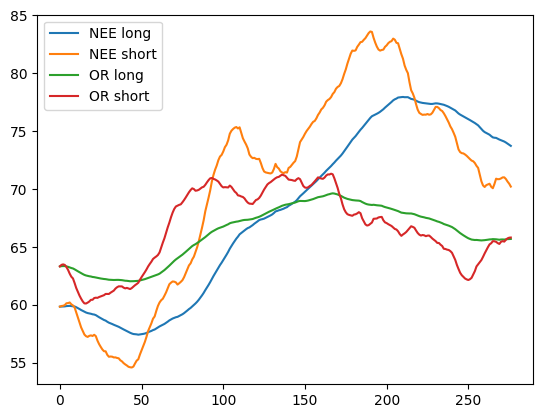

In [63]:
plt.figure()
plt.plot(exp_ma_NEE_long, label= "NEE long")
plt.plot(exp_ma_NEE_short, label= "NEE short")
plt.plot(exp_ma_SHEL_long, label= "OR long")
plt.plot(exp_ma_SHEL_short, label= "OR short")
plt.legend()
plt.show()

### Trading signals
The trading signals are extracted in an easy way:
- if the ema in the short period is higher than the one calculated in the long period, we have a bullish signal, so it is worth to buy;
- if the ema in the short period is lower than the one calculated in the long period, we have a bearish signal, so it is worth to sell.

In [64]:
def momentum_signal(data, exp_short, exp_long):
    data["Signal"] = 0  # Default no position
    data.loc[exp_short > exp_long, "Signal"] = 1  # Buy signal when short EMA > long EMA
    data.loc[exp_short < exp_long, "Signal"] = -1  # Sell signal when short EMA < long EMA
    return data


signal_NEE=momentum_signal(NEE,exp_ma_NEE_short, exp_ma_NEE_long)
signal_SHEL=momentum_signal(SHELL,exp_ma_SHEL_short, exp_ma_SHEL_long)

In [65]:
def buy_sell(stock):
  buy_signal= stock[stock["Signal"]==1]
  sell_signal= stock[stock["Signal"]==-1]
  return buy_signal, sell_signal

buy_signal, sell_signal= buy_sell(signal_NEE)
buy_signal_SHEL, sell_signal_SHEL= buy_sell(signal_SHEL)

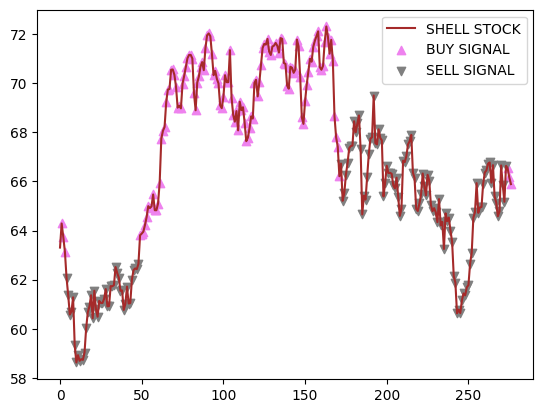

In [66]:
plt.figure()
plt.plot(SHELL["SHEL"], label= "SHELL STOCK", color="brown")
plt.scatter(buy_signal_SHEL.index, buy_signal_SHEL["SHEL"], label= "BUY SIGNAL", marker= "^", color="violet")
plt.scatter(sell_signal_SHEL.index,sell_signal_SHEL["SHEL"], label= "SELL SIGNAL", marker= "v", color="grey")
plt.legend()
plt.show()

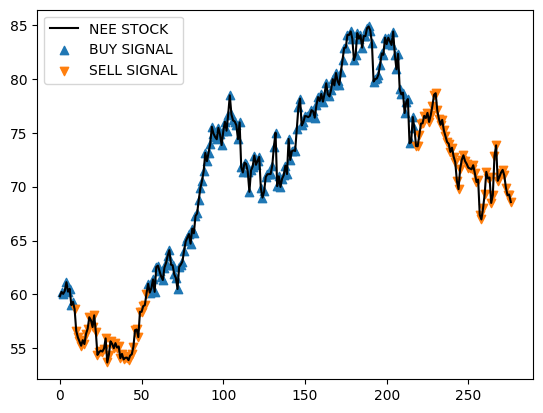

In [67]:
plt.figure()
plt.plot(NEE["NEE"], label= "NEE STOCK", color="black")
plt.scatter(buy_signal.index, buy_signal["NEE"], label= "BUY SIGNAL", marker= "^")
plt.scatter(sell_signal.index,sell_signal["NEE"], label= "SELL SIGNAL", marker= "v")
plt.legend()
plt.show()

SHELL suggests a bullish case, so it implies the change to buy this stock; NEE has a bearish signal, providing insightful information on the renewable energy market. We expect a downturn movement, so we need to sell right now.

## RSI: relative strength index


---

To complete our analysis, we can go further and calculating the RSI.
It shows the speed of rising or falling in priced and it oscillates between 0 and 100.

- $RSI>70$ indicates an overbought case and for that reason the assets are overvalued and the price may reverse;
- $RSI<30$ indicates an oversold market condition, which means the asset is undervalued and the price may rally.

We need to calculate:
- the average value of the upward price in N periods over the average value of the downturn price in N periods and this is RS;
- the formula is $100 -\frac{100}{1+RS}$

In [68]:
def up_down(stock):
  stock["perc_change"]=stock.pct_change().ffill()
  stock_up=stock["perc_change"].apply(lambda x: x if x>0 else 0)
  stock_down=stock["perc_change"].apply(lambda x: x if x<0 else 0)
  return stock_up,stock_down

NEE_stock_up= up_down(NEE["NEE"])[0]
NEE_stock_down= up_down(NEE["NEE"])[1]
SHEL_stock_up= up_down(SHELL["SHEL"])[0]
SHEL_stock_down= up_down(SHELL["SHEL"])[1]
NEE_stock_up

<ipython-input-68-efc66410cf16>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-efc66410cf16>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-efc66410cf16>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-efc66410cf16>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,NEE
0,0.000000
1,0.006822
2,0.000000
3,0.004531
4,0.013531
...,...
272,0.000000
273,0.000000
274,0.000000
275,0.001012


In [69]:
def rolling_mean(up, down):
  average_up= up.rolling(window=14, min_periods=1).mean()
  average_down= down.rolling(window=14, min_periods=1).mean().abs()
  return average_up, average_down

NEE_average_up= rolling_mean(NEE_stock_up,NEE_stock_down)[0]
NEE_average_down= rolling_mean(NEE_stock_up,NEE_stock_down)[1]
SHEL_average_up= rolling_mean(SHEL_stock_up,SHEL_stock_down)[0]
SHEL_average_down= rolling_mean(SHEL_stock_up,SHEL_stock_down)[1]
NEE_average_up, SHEL_average_up

(0      0.000000
 1      0.003411
 2      0.002274
 3      0.002838
 4      0.004977
          ...   
 272    0.011194
 273    0.010106
 274    0.008730
 275    0.006658
 276    0.006658
 Name: NEE, Length: 277, dtype: float64,
 0      0.000000
 1      0.007738
 2      0.005158
 3      0.003869
 4      0.003095
          ...   
 272    0.005025
 273    0.005581
 274    0.005093
 275    0.004996
 276    0.004706
 Name: SHEL, Length: 277, dtype: float64)

In [70]:
RS_NEE=NEE_average_up/(NEE_average_down)
RS_SHEL=SHEL_average_up/(SHEL_average_down)
RS_NEE, RS_SHEL

(0           NaN
 1           inf
 2      2.225600
 3      3.703798
 4      8.118307
          ...   
 272    1.675352
 273    1.289409
 274    1.020648
 275    0.778408
 276    0.768408
 Name: NEE, Length: 277, dtype: float64,
 0           NaN
 1           inf
 2      1.817183
 3      0.859276
 4      0.443459
          ...   
 272    1.064584
 273    1.182292
 274    1.055015
 275    0.956259
 276    0.853109
 Name: SHEL, Length: 277, dtype: float64)

In [71]:
RSI_NEE= 100- (100/(1+RS_NEE))
RSI_SHEL= 100- (100/(1+RS_SHEL))
RSI_NEE.iloc[-20:-1],RSI_SHEL.iloc[-20:-1]

(257    35.400739
 258    36.472317
 259    30.759105
 260    34.596769
 261    44.171254
 262    43.868875
 263    45.262657
 264    38.580609
 265    42.042102
 266    54.117575
 267    55.593440
 268    49.181513
 269    51.982822
 270    52.396673
 271    62.846119
 272    62.621738
 273    56.320613
 274    50.510936
 275    43.769936
 Name: NEE, dtype: float64,
 257    80.632992
 258    80.255789
 259    84.089599
 260    83.861269
 261    83.422705
 262    84.873166
 263    84.273169
 264    75.977176
 265    75.335724
 266    63.485759
 267    54.418370
 268    49.269709
 269    42.117557
 270    62.861585
 271    55.894224
 272    51.564087
 273    54.176624
 274    51.338552
 275    48.882023
 Name: SHEL, dtype: float64)

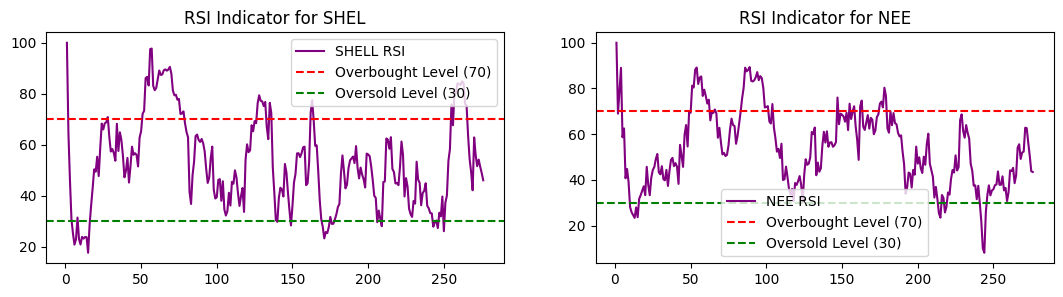

In [72]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,3))
ax1.plot(RSI_SHEL, label="SHELL RSI", color="purple")
ax1.axhline(70, linestyle="--", color="red", label="Overbought Level (70)")
ax1.axhline(30, linestyle="--", color="green", label="Oversold Level (30)")
ax1.legend()
ax1.set_title("RSI Indicator for SHEL")
ax2.plot(RSI_NEE, label="NEE RSI", color="purple")
ax2.axhline(70, linestyle="--", color="red", label="Overbought Level (70)")
ax2.axhline(30, linestyle="--", color="green", label="Oversold Level (30)")
ax2.legend()
ax2.set_title("RSI Indicator for NEE")
plt.show()

### Results analysis
The NEE RSI is equal to 43.769936; instead the SHELL RSI is equal to 48.882023.
This suggests a normal condition, without overbought or oversold situation.
- If instead we have short EWA > long EWA and a RSI < 30, this is a bullish signal and we have a strong buying signal;
- If we short EWA < long EWA and a RSI > 70, this is a bearish signal and we have a strong selling signal.

Let's compare the RSI results with the closes prices.

In [73]:
NEE["NEE"].iloc[-6:-1]

,NEE
271,71.559998
272,71.050003
273,69.900002
274,69.199997
275,69.269997


In [74]:
SHELL["SHEL"].iloc[-6:-1]

,SHEL
271,65.849998
272,65.169998
273,66.629997
274,66.529999
275,66.160004


Detecting the movements in the RSI and in the prices, we can extract:

- NEE RSI indicates a reversal because it starts with an upward trend and then it becomes lower lows; the prices are lower lows and higher lows. It doesn't suggest any hidden movement, but it suggests a good bearish movement.
It basically means that if we are in a long position, we need to exit; if we want to consider a short trade, we need more confirmation, also by looking at the candlestick;

- SHELL RSI is in a downturn movement because it has a high peak and then it oscillates between lower highs and lower lows; the prices are oscillating between lower highs and higher highs(just a bit!). This could mean that we are in a reversal case, maybe a bearish case because the prices are higher highs and the RSI is in a downturn movement!
If we try to connect the ema and the RSI, we can say that the **buying momentum is fading** and the buying pressure is lower and it could start a short signal, but we need more confirmation.

These are connected to the very basic concept of the hidden divergence of the RSI, meaning that:

- for a RSI that is lower low and the prices are higher lows, we have a **bearish signal**;
- for the RSI that is higher high and the prices are lower highs, we have a **bullish signal**.

In [75]:
fig = go.Figure(data=[go.Candlestick(x=NEE_general.index,
                open=NEE_general['Open', "NEE"],
                high=NEE_general['High',"NEE"],
                low=NEE_general['Low',"NEE"],
                close=NEE_general['Close',"NEE"])])

fig.update_layout(title_text="NEE candlestick",
    title_font_family="Times New Roman",
    title_font_color="red")

fig.show()

In [76]:
fig1 = go.Figure(data=[go.Candlestick(x=SHELL_general.index,
                open=SHELL_general['Open', "SHEL"],
                high=SHELL_general['High',"SHEL"],
                low=SHELL_general['Low',"SHEL"],
                close=SHELL_general['Close',"SHEL"])])

fig1.update_layout(title_text="SHELL candlestick",
    title_font_family="Times New Roman",
    title_font_color="red")

fig1.show()

### Conclusions


---

With the moving average, the strategy was quite sure: selling position for NEE and buying position for SHELL.

Instead, with the RSI the investor could need more information to end up with a conclusion because basically the result is quite neutral.

